In [48]:
# import pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read in the csv from https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv
f=pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv")


In [4]:
# view the head
f.head

<bound method DataFrame.head of       RespondentID How often do you travel by plane?  \
0       3436139758               Once a year or less   
1       3434278696               Once a year or less   
2       3434275578               Once a year or less   
3       3434268208               Once a year or less   
4       3434250245              Once a month or less   
5       3434245875               Once a year or less   
6       3434235351              Once a month or less   
7       3434218031               Once a year or less   
8       3434213681               Once a year or less   
9       3434172894               Once a year or less   
10      3434165659              Once a month or less   
11      3434164339               Once a year or less   
12      3434161941               Once a year or less   
13      3434155493                             Never   
14      3434132453                             Never   
15      3434131535               Once a year or less   
16      34341251

In [20]:
# view the columns - use iteration to print them out
for x in f:
    print x

RespondentID
How often do you travel by plane?
Do you ever recline your seat when you fly?
How tall are you?
Do you have any children under 18?
In a row of three seats, who should get to use the two arm rests?
In a row of two seats, who should get to use the middle arm rest?
Who should have control over the window shade?
Is itrude to move to an unsold seat on a plane?
Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?
On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?
Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?
Is itrude to recline your seat on a plane?
Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?
Is it rude to ask someone to switch seats with you in order to be closer to friends?
Is itrude to ask someone to switch seats with you 

In [21]:
# rename columns with shorter name
f.columns=["ID","Flying Frequency","Recline","Height","Child_Under_18","2 Armrests","Mid Armrest","Window Shade",\
          "Rude to Move","Too verbose","LA to NYC Standups Max","Reclining Sensitivity","Reclining Rude",\
           "No Reclining","Friend Seat Switch","Family Seat Switch","Wakeup Bathroom", "Wakeup Walk Around",\
          "Quite Baby Bad","Obnoxious Baby Bad","Electronics unrulefully","Smoke illegally","Gender","Age",\
           "Household Income","Education","Location"]


In [23]:
# view head again - now just 3 rows
f.head


<bound method DataFrame.head of               ID       Flying Frequency              Recline Height  \
0     3436139758    Once a year or less                  NaN    NaN   
1     3434278696    Once a year or less  About half the time   6'3"   
2     3434275578    Once a year or less              Usually   5'8"   
3     3434268208    Once a year or less               Always  5'11"   
4     3434250245   Once a month or less  About half the time   5'7"   
5     3434245875    Once a year or less              Usually   5'9"   
6     3434235351   Once a month or less      Once in a while   6'2"   
7     3434218031    Once a year or less      Once in a while   6'0"   
8     3434213681    Once a year or less      Once in a while   6'0"   
9     3434172894    Once a year or less                Never   5'6"   
10    3434165659   Once a month or less              Usually   6'0"   
11    3434164339    Once a year or less                  NaN    NaN   
12    3434161941    Once a year or less      

In [25]:
# view the last 3 rows
f.iloc[-3:,0:]


ID     Flying Frequency          Recline Height Child_Under_18  \
1037  3431731485                Never              NaN    NaN            NaN   
1038  3431731196                Never              NaN    NaN            NaN   
1039  3431729581  Once a year or less  Once in a while   6'3"             No   

                          2 Armrests                     Mid Armrest  \
1037                             NaN                             NaN   
1038                             NaN                             NaN   
1039  The arm rests should be shared  The arm rests should be shared   

                                  Window Shade         Rude to Move  \
1037                                       NaN                  NaN   
1038                                       NaN                  NaN   
1039  Everyone in the row should have some say  No, not rude at all   

              Too verbose         ...          Wakeup Walk Around  \
1037                  NaN         ...                         NaN   
1038                  NaN         ...                         NaN   
1039  No, not at all rude         ...          Yes, somewhat rude   

          Quite Baby Bad Obnoxious Baby Bad Electronics unrulefully  \
1037                 NaN                NaN                     NaN   
1038                 NaN                NaN                     NaN   
1039  Yes, somewhat rude     Yes, very rude                      No   

     Smoke illegally  Gender    Age   Household Income  \
1037             NaN  Female   > 60                NaN   
1038             NaN  Female  30-44  $50,000 - $99,999   
1039              No    Male   > 60  $50,000 - $99,999   

                             Education            Location  
1037  Some college or Associate degree  East North Central  
1038                   Bachelor degree         New England  
1039                   Bachelor degree             Pacific  

[3 rows x 27 columns]

In [29]:
# check the data type of the DataFrame
f.index


RangeIndex(start=0, stop=1040, step=1)

In [31]:
# How many unique travel frequencies are there? What are they?
f["Flying Frequency"].nunique()


6

In [32]:
# How many unique regions are there? What are they?
f["Location"].nunique()


9

In [33]:
f["Location"].unique()

array([nan, 'Pacific', 'East North Central', 'New England', 'Mountain',
       'South Atlantic', 'East South Central', 'Middle Atlantic',
       'West North Central', 'West South Central'], dtype=object)

In [45]:
# Select just those columns that relate to the personal characteristics of the person
# Save that as a DataFrame name char
new=["Height","Gender","Age","Household Income","Education","Location"]
new2=f[new]
new2=new2.iloc[1:,0:]

In [61]:
# From the new char DataFrame, select the height. Can you create a histogram?
new2["Height"].hist()
        


TypeError: cannot concatenate 'str' and 'float' objects

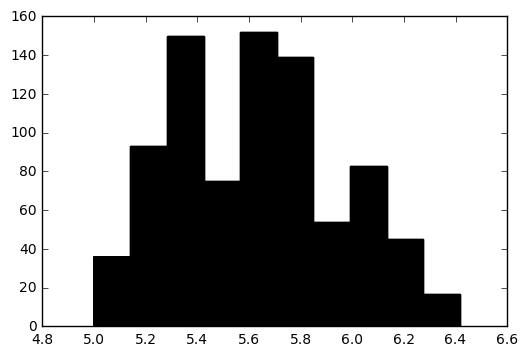

In [105]:
# Create a histogram by creating a list comprehension + a function to turn the data into inches

def conv(x):
    a=int(x[0])
    y=x[1].replace("\"","")
    y=float(y)
    y=y/12
    a+=y
    return a
    

h=[]
for x in new2["Height"]:
    if type(x)==float:
        pass
    else:
        h.append(x.split("\'"))
        
und=[]
abo=[]
bet=[]
for x in h:
    if "Under" in x[0]:
        und.append(x)
    elif "above" in x[1]:
        abo.append(x)
    else:
        bet.append(x)
new=[]
for x in bet:
    new.append(conv(x))
plt.hist(new)
plt.show()

In [106]:
# Slice the first 3 columns using .iloc notation, then use the double bracket notation
c1=f.iloc[0:,:3]
c1


ID       Flying Frequency              Recline
0     3436139758    Once a year or less                  NaN
1     3434278696    Once a year or less  About half the time
2     3434275578    Once a year or less              Usually
3     3434268208    Once a year or less               Always
4     3434250245   Once a month or less  About half the time
5     3434245875    Once a year or less              Usually
6     3434235351   Once a month or less      Once in a while
7     3434218031    Once a year or less      Once in a while
8     3434213681    Once a year or less      Once in a while
9     3434172894    Once a year or less                Never
10    3434165659   Once a month or less              Usually
11    3434164339    Once a year or less                  NaN
12    3434161941    Once a year or less                Never
13    3434155493                  Never                  NaN
14    3434132453                  Never                  NaN
15    3434131535    Once a year or less      Once in a while
16    3434125180   A few times per week                  NaN
17    3434122066    Once a year or less               Always
18    3434114105    Once a year or less      Once in a while
19    3434109246    Once a year or less                  NaN
20    3434107997    Once a year or less                Never
21    3434100967    Once a year or less      Once in a while
22    3434087928                  Never                  NaN
23    3434084098                  Never                  NaN
24    3434071488                  Never                  NaN
25    3434061256                  Never                  NaN
26    3434059758                  Never                  NaN
27    3434052290    Once a year or less      Once in a while
28    3434049700    Once a year or less  About half the time
29    3434041278    Once a year or less               Always
...          ...                    ...                  ...
1010  3431751287    Once a year or less               Always
1011  3431751153   Once a month or less      Once in a while
1012  3431751080   Once a month or less              Usually
1013  3431748816    Once a year or less               Always
1014  3431748763    Once a year or less      Once in a while
1015  3431748698  A few times per month                Never
1016  3431747718    Once a year or less               Always
1017  3431746726    Once a year or less      Once in a while
1018  3431745079                  Never                  NaN
1019  3431744747   Once a month or less      Once in a while
1020  3431744533  A few times per month      Once in a while
1021  3431744015                  Never                  NaN
1022  3431743115   Once a month or less  About half the time
1023  3431741243    Once a year or less                Never
1024  3431740654    Once a year or less      Once in a while
1025  3431738966  A few times per month               Always
1026  3431737634    Once a year or less      Once in a while
1027  3431737213    Once a year or less              Usually
1028  3431737008    Once a year or less                Never
1029  3431736876   Once a month or less      Once in a while
1030  3431736855                  Never                  NaN
1031  3431736438                  Never                  NaN
1032  3431735911    Once a year or less               Always
1033  3431734973                  Never                  NaN
1034  3431734398  A few times per month      Once in a while
1035  3431732652    Once a year or less      Once in a while
1036  3431731770                  Never                  NaN
1037  3431731485                  Never                  NaN
1038  3431731196                  Never                  NaN
1039  3431729581    Once a year or less      Once in a while

[1040 rows x 3 columns]

In [ ]:
## Create a dictionary using .unique and a dictionary comprehension
## Then use a list comprehension with a function to update the count the number of degrees
## How many degreee of each type are there?
d={}





In [ ]:
# Now use the education column with the .value_counts() method to check your work. Are they the same?

